In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

!pip install opencv-python

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x15d247f49a0>)

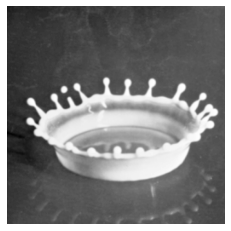

In [10]:
src = cv2.imread('milkdrop.bmp', cv2.IMREAD_GRAYSCALE)
plt.axis('off'),plt.imshow(src,cmap='gray')

In [5]:
if src is None:

    print('Image load failed!')

    sys.exit()

오츠기법을 활용하여 원본이미지를 지역 이진화 해줍니다.

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x15d268c48e0>)

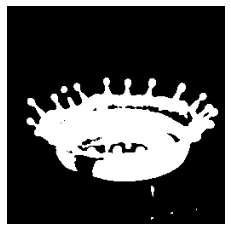

In [11]:
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)
plt.axis('off'),plt.imshow(src_bin,cmap='gray')

외곽선 검출 함수를 통해 contours인자를 받아줍니다. contours는 검출된 외곽선의 좌표입니다.  K,1,2 형태로 되어있으며, K는 외곽선 점들의 개수, 1은 더미, 2는 x,y좌표입니다. hierachy는 받지 않을것이기 때문에 _ 처리해줍니다.

In [7]:
contours, _ = cv2.findContours(src_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

원본 이미지와 같은 크기의 배경영상을 만들어 줍니다. 외곽선을 컬러로 그릴거기 때문에 3channel로 해줍니다.

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x15d26914670>)

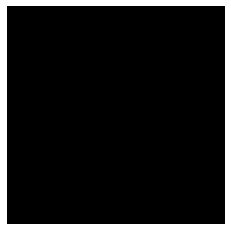

In [12]:
h, w = src.shape[:2]

dst = np.zeros((h, w, 3), np.uint8)
plt.axis('off'),plt.imshow(dst)

외곽선의 개수만큼 for루프를 돌기위해 len(contours)를 해줍니다. 

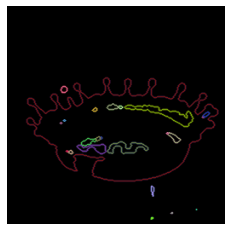

In [14]:
for i in range(len(contours)):

    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    cv2.drawContours(dst, contours, i, c, 1, cv2.LINE_AA)
    plt.axis('off'),plt.imshow(dst)

In [15]:
cv2.imshow('src', src)

cv2.imshow('src_bin', src_bin)

cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()

위 방법은 Contour의 개수만큼 For Loop를 도는 방법으로 더 간편한 방법입니다.